In [1]:
import random
import pandas as pd
import numpy as np
import simpy
import matplotlib.pyplot as plt
from scipy.stats import norm
import itertools

In [17]:
dice_sides = [1,2,3,4,5,6]
probs = []

for i in dice_sides:
    probs.append(i/sum(dice_sides))

roll_dict = dict(zip(dice_sides, probs))

max_outcomes = len(dice_sides) * len(dice_sides)

In [18]:
def roll_dice():
    q = np.random.choice(dice_sides,p=probs)
    probq = roll_dict[q]
    x = np.random.choice(dice_sides,p=probs)
    probx = roll_dict[x]

    return q, x, probq, probx, q+x

In [19]:
sample = 100000
holder = []
for i in range(sample):
    a,b,c,d,e = roll_dice()
    smallholder = [a,b,c,d,e]
    holder.append(smallholder)
    

In [20]:
df = pd.DataFrame(holder,columns=['dice1','dice2','prob_dice1','prob_dice2','roll_value'])

df_mean = df['roll_value'].mean()
df_var = df['roll_value'].var()

print(f'mean = {df_mean} & var = {df_var}')

mean = 8.67493 & var = 4.456464059742067


In [21]:
df.head()

,dice1,dice2,prob_dice1,prob_dice2,roll_value
0,5,4,0.238095,0.190476,9
1,3,2,0.142857,0.095238,5
2,3,3,0.142857,0.142857,6
3,1,3,0.047619,0.142857,4
4,3,4,0.142857,0.190476,7


In [22]:
newdf = df.groupby(['roll_value','dice1','dice2']).mean()[['prob_dice1','prob_dice2']]
newdf['newprob'] = newdf['prob_dice1'] * newdf['prob_dice2']
sum_countsdf = df['roll_value'].value_counts().sort_index().reset_index()
sum_probsdf = newdf.groupby(['roll_value']).sum()['newprob'].reset_index()

In [23]:
combined_df = sum_probsdf.merge(sum_countsdf, left_on='roll_value',right_on='index',how='left')
combined_df.drop('index', axis=1, inplace=True)
combined_df.rename(columns={'roll_value_x':'roll_sum','newprob':'prob_of_sum','roll_value_y':'count_occurrences'},
                   inplace=True)
combined_df

,roll_sum,prob_of_sum,count_occurrences
0,2,0.002268,245
1,3,0.009070,950
2,4,0.022676,2261
3,5,0.045351,4467
4,6,0.079365,7751
5,7,0.126984,12780
6,8,0.158730,15843
7,9,0.172336,17079
8,10,0.165533,16672
9,11,0.136054,13791


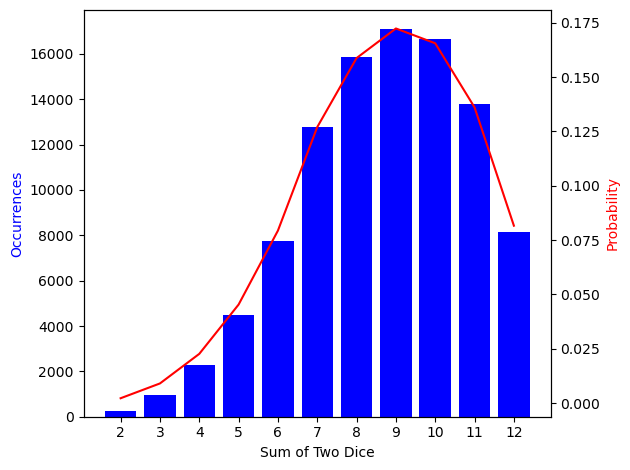

In [24]:
fig, ax1 = plt.subplots()

ax1.bar(combined_df['roll_sum'],combined_df['count_occurrences'],color='blue')
ax1.set_xticks(np.arange(len(combined_df['roll_sum'])+2))
ax1.set_xlabel('Sum of Two Dice')
ax1.set_ylabel('Occurrences', color='blue')


ax2 = ax1.twinx()
ax2.plot(combined_df['roll_sum'],combined_df['prob_of_sum'], color = 'red')
ax2.set_ylabel('Probability', color='red')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xlabel
plt.show()